<a href="https://colab.research.google.com/github/sr1jan/ProbabilisticGraphicalModelling/blob/master/PGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook is constructed to keep track of topics covered and examples implemented while learning Probabilistic Graphical Modelling and Bayesian Network.

Author: [Srijan Singh](https://github.com/sr1jan)

Created on: 13/01/2020

References:
  * [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)

Tools used:
  * [Tensorflow Probability](https://www.tensorflow.org/probability)
  * [Distribution simulation](https://www.essycode.com/distribution-viewer/)

# Bayesian Methodology

### Bayesian way of thinking
> You have a __belief__ that probability of getting a head(let's say 0.8) is more than the tail because of your __past experience__. You challenge your friend in a long coin flipping contest for a period of 12 months. After every month, you __update__ your previous belief based on __new evidence__ of the coin flip and hence readjust the probability. After the end of the year, your belief of getting a head is 0.5 with some __uncertainity__ involved.  

* In essence, Bayesian methodology is about having a prior belief __(prior probability)__ of an event and updating that belief on seeing new evidence __(likelihood)__ and hence as a result forming new belief __(posterior probability)__ about the event. 


### Advantages of using a Bayesian approach

* Bayes's theorem helps in quantifying the __uncertainity__ of an event using probabilistic model which differentiates it from the frequentist approach where a point estimate is calculated which doesn't give much insight about the event.

* Bayesian approach also integrates the domain knowledge(prior) of the event that we are modeling, thereby, providing a informative starting point for our model. Though, also note that an uninformative prior can be created to reflect a balance among outcomes when no information is available. 

### Random variable
* A random variable is described as a variable whose values depend on a random process.
  * For example, in the case of our coin flip challenge a variable ```X``` could be considered as a random variable whose value could either be 1(head) or 0(tail) depending on the outcome of coin flip(random process)
  * Here ```X``` is a __discrete random variable__ as it can only take discrete values. Discrete data can only take certain values, for example: number of students in a class, we can't have half a student.

   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Random_Variable_as_a_Function-en.svg/440px-Random_Variable_as_a_Function-en.svg.png" width="40%"/>

  * Temperature, age, height, weight are all examples of __continuous random variable__ as it can take infinitely many values. For example, a random variable measuring the time taken for something to be done is continuous since there are an infinite number of possible times that can be taken.

### Probability Distribution
* It can be considered as a function which takes in a random variable, let's say ```X``` and assign probabilities to each of it's outcome.
  * __Bernoulli distribution__ can be used to represent the random variable ```X``` modelling two possible outcomes.  A bernoulli distribution is discrete, as opposed to continuous, since only 1 or 0 is a valid response.

   <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRq5ZCwpkt6VoWgNGKJMI1c7jypa5eUUnz0YgEK1gX0WF1DKuQl" width="40%" />
  * The most commonly used distribution is the __Gaussian distribution__,also referred as __Normal distribution__ or __bell curve__ is used frequently in finance, investing, science, and engineering. 

   <img src="https://miro.medium.com/max/2000/1*s_4OIdPSzuZcevhBdOmCQA.png" width="50%"/> 
   <img src="https://miro.medium.com/max/259/1*6_123CZ7Ni9WfTXdtlxDcw.jpeg" alt="Mathematical formula for Gaussian probability distribution function." width="25%" />

  * It is so popular mainly because of three reasons:
    * __Ubiquitous in natural phenomena__
      * Incredible number of processes in nature and social sciences naturally follows the Gaussian distribution. Even when they don’t, the Gaussian gives the best model approximation for these processes. 
    * __Mathematical Reason: Central Limit Theorem__
      * Central limit theorem states that when we add large number of independent random variables, irrespective of the original distribution of these variables, their normalized sum tends towards a Gaussian distribution. For example, the distribution of total distance covered in an random walk tends towards a Gaussian probability distribution.
      * Once a Gaussian, always a Gaussian!
      Unlike many other distribution that changes their nature on transformation, a Gaussian tends to remain a Gaussian.
        * Product of two Gaussian is a Gaussian
        * Sum of two independent Gaussian random variables is a Gaussian
        * Convolution of Gaussian with another Gaussian is a Gaussian
        * Fourier transform of Gaussian is a Gaussian
    * __Simplicity__
      * For every Gaussian model approximation, there may exist a complex multi-parameter distribution that gives better approximation. But still Gaussian is preferred because it makes the math a lot simpler!

        * Its mean, median and mode are all same
        * The entire distribution can be specified using just two parameters- mean and variance
        

### Mathematical representation of Bayes's theorem is given by,
![Bayes' Theorem](https://www.gstatic.com/education/formulas/images_long_sheet/bayes__theorem.svg)

```
  A, B	  = 	events

  P(A|B)	= 	probability of A given B is true

  P(B|A)	= 	probability of B given A is true

  P(A), P(B) =    the independent probabilities of A and B
```

> There are specific techniques that can be used to quantify the probability for multiple random variables, such as the ```joint```, ```marginal```, and ```conditional probability```. These techniques provide the basis for a probabilistic understanding of fitting a predictive model to data.


### Joint Probability
_The probability of two (or more) events is called the joint probability._

  * For example, the joint probability of event A and event B is written formally as: 
  
  ```P(A and B)``` 
  
  The “and” or conjunction is denoted using the upside down capital “U” operator “^” or sometimes a comma “,”. 
  
  ```P(A ^ B), P(A, B), P(AB)```
  
  * The joint probability for events A and B is calculated the probability of event A given event B multiplied by the probability of event B. 
  
  This can be stated formally as follows: ```P(A and B) = P(A given B) * P(B)```

  * The calculation of the joint probability is sometimes called the fundamental rule of probability or the __“product rule”__ of probability or the __“chain rule”__ of probability.

  * Here, ```P(A given B)``` is the probability of event A given that event B has occurred, called the conditional probability, described below.

  * The joint probability is _symmetrical_, meaning that ```P(A and B)``` is the same as ```P(B and A)```. The calculation using the conditional probability is also symmetrical, for example:

    ```P(A and B) = P(A given B) * P(B) = P(B given A) * P(A)```


### Marginal Probability
_Marginal probability is the probability of an event irrespective of the outcome of another variable._
* The probability of the evidence P(B) can be calculated using the law of total probability. If ```P(B)``` is a partition of the sample space, which is the set of all outcomes of an experiment, then,

  <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8867372a5e203835363cbad1ae1cbaa1defb15af" />

* When there are an infinite number of outcomes, it is necessary to integrate over all outcomes to calculate ```P(B)``` using the law of total probability. 
* Often, ```P(B)``` is difficult to calculate as the calculation would involve sums or integrals that would be time-consuming to evaluate, so often only the product of the prior and likelihood is considered, since the evidence does not change in the same analysis. The posterior is proportional to this product:

  <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e1a83fc9b2788b4a72bbc4c90d06c67bb7e0fdae" width="50%"/>

* The __maximum a posteriori__, which is the mode of the posterior and is often computed in Bayesian statistics using mathematical optimization methods, remains the same. The posterior can be approximated even without computing the exact value of ```P(B)``` with methods such as __Markov chain Monte Carlo__ or __Variational inference__ Bayesian methods.



### Conditional Probability
_The probability of one event given the occurrence of another event is called the conditional probability._ 

  * Types of event:
    * Independent event: Each event is not affected by any other events.
      * For example: Tossing of a coind, each toss of a coin is a perfect isolated thing. What it did in the past will not affect the current toss.
    * Dependent event: They can be affected by previous events
      * For example: Marbles in a bag.

        2 blue and 3 red marbles are in a bag. What are the chances of getting a blue marble? The chance is 2 in 5, but after taking one out the chances change!

        So the next time:

         * If we got a red marble before, then the chance of a blue marble next is 2 in 4

         * If we got a blue marble before, then the chance of a blue marble next is 1 in 4

          <img src="https://www.mathsisfun.com/data/images/probability-marbles1.svg" width="40%"/>

  * ```P(B|A)``` is also called the __"Conditional Probability"__ of B given A.

  And in our case: ```P(B|A) = 1/4```

  So the probability of getting 2 blue marbles is:

  <img src="https://www.mathsisfun.com/data/images/probability-marbles-tree4.svg" />

  And we write it as:
  
  <img src="https://www.mathsisfun.com/data/images/probability-independent-formula1.svg" />
  
  Probability of __event A__ and __event B__ equals
  the probability of __event A__ times the probability of __event B given event A__

  * Using Algebra we can also "change the subject" of the formula, like this:

  ```
    Start with: P(A and B) = P(A) x P(B|A)
    Swap sides: P(A) x P(B|A) = P(A and B)
    Divide by P(A): P(B|A) = P(A and B) / P(A)
  ```

  And we have another useful formula:

  <img src="https://www.mathsisfun.com/data/images/probability-independent-formula2.gif" /> 
  
  The probability of __event B given event A__ equals
  the probability of __event A and event B__ divided by the probability of __event A__

# Coin flip example

In [0]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

import tensorflow as tf
import tensorflow_probability as tfp
import collections

tfd = tfp.distributions

# tensorflow eager: tf ops immediately evaluated and produced as result
try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()


In [0]:
# Build Graph
rv_coin_flip_prior = tfd.Bernoulli(probs=0.5, dtype=tf.int32)

num_trials = tf.constant([0,1, 2, 3, 4, 5, 8, 15, 50, 500, 1000, 2000])

coin_flip_data = rv_coin_flip_prior.sample(num_trials[-1])

# prepend a 0 onto tally of heads and tails, for zeroth flip
coin_flip_data = tf.pad(coin_flip_data,tf.constant([[1, 0,]]),"CONSTANT")

# compute cumulative headcounts from 0 to 2000 flips, and then grab them at each of num_trials intervals
cumulative_headcounts = tf.gather(tf.cumsum(coin_flip_data), num_trials)

rv_observed_heads = tfd.Beta(
    concentration1=tf.cast(1 + cumulative_headcounts, tf.float32),
    concentration0=tf.cast(1 + num_trials - cumulative_headcounts, tf.float32))

probs_of_heads = tf.linspace(start=0., stop=1., num=100, name="linspace")
observed_probs_heads = tf.transpose(rv_observed_heads.prob(probs_of_heads[:, tf.newaxis]))

In [0]:
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.

    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.contrib.framework.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.contrib.framework.is_tensor(t) else t
             for t in tf.contrib.framework.nest.flatten(tensors)])
    return sess.run(tensors)

In [0]:
# Execute graph
[num_trials_,
probs_of_heads_,
observed_probs_heads_,
cumulative_headcounts_,
] = evaluate([
  num_trials,
  probs_of_heads,
  observed_probs_heads,
  cumulative_headcounts
])

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



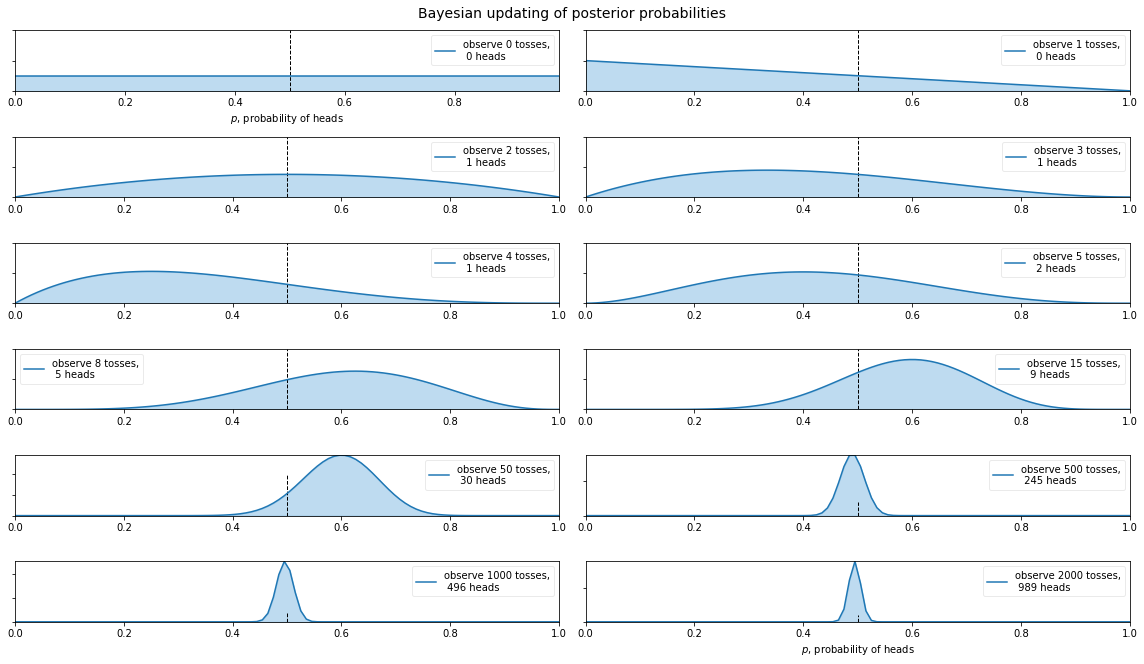

In [0]:
# For the already prepared, I'm using Binomial's conj. prior.
plt.figure(figsize(16.0, 9.0))
for i in range(len(num_trials_)):
    sx = plt.subplot(len(num_trials_)/2, 2, i+1)
    plt.xlabel("$p$, probability of heads") \
    if i in [0, len(num_trials_)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    plt.plot(probs_of_heads_, observed_probs_heads_[i], 
             label="observe %d tosses,\n %d heads" % (num_trials_[i], cumulative_headcounts_[i]))
    plt.fill_between(probs_of_heads_, 0, observed_probs_heads_[i], 
                     color=TFColor[3], alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities", y=1.02,
             fontsize=14)
plt.tight_layout()